# Activity Monitor

This notebook serves as an introduction to working with the Activity Monitor data in mHealth format. It will open one file and make a few plots.

Information on this format may be found at https://github.com/openmhealth 


File organization is expected to follow this pattern:

pilot_data_root           
&emsp;wearable_activity_monitor    
&emsp;&emsp;manifest.tsv    
&emsp;&emsp;heart_rate    
&emsp;&emsp;&emsp;garmin_vivosmart5    
&emsp;&emsp;&emsp;&emsp;0001    
&emsp;&emsp;&emsp;&emsp;&emsp;0001_heartrate.json     
&emsp;&emsp;&emsp;&emsp;0002    
&emsp;&emsp;&emsp;&emsp;&emsp;0002_heartrate.json   
&emsp;&emsp;sleep    
&emsp;&emsp;&emsp;garmin_vivosmart5    
&emsp;&emsp;&emsp;&emsp;0001    
&emsp;&emsp;&emsp;&emsp;&emsp;0001_sleep.json     
&emsp;&emsp;&emsp;&emsp;0002    
&emsp;&emsp;&emsp;&emsp;&emsp;0002_sleep.json  
&emsp;&emsp;&emsp;&emsp;... etc.

In [242]:
import json

import pandas as pd

from datetime import datetime, timedelta

import matplotlib.pyplot as plt  # to make plots
import matplotlib.dates as mdates  # to use ConciseDateFormatter

## custom path -- change to match your file structure

In [243]:
pilot_data_root = "Dataset/dataset/"  # change this to your own path

# Read the manifest

In [244]:
manifest_path = pilot_data_root + "wearable_activity_monitor/manifest.tsv"
print(manifest_path)

Dataset/dataset/wearable_activity_monitor/manifest.tsv


In [245]:
dfm = pd.read_csv(manifest_path, sep='\t')
print(dfm.columns)

Index(['participant_id', 'wrist_worn_on', 'dominant_hand',
       'heartrate_filepath', 'heartrate_record_count', 'average_heartrate_bpm',
       'oxygen_saturation_filepath', 'oxygen_saturation_record_count',
       'average_oxygen_saturation_pct', 'stress_level_filepath',
       'stress_level_record_count', 'average_stress_level', 'sleep_filepath',
       'sleep_record_count', 'average_sleep_hours',
       'respiratory_rate_filepath', 'respiratory_rate_record_count',
       'average_respiratory_rate_bpm', 'physical_activity_filepath',
       'physical_activity_num_days', 'average_daily_activity',
       'active_calories_filepath', 'active_calories_record_count',
       'average_active_calories_kcal', 'sensor_sampling_duration_days',
       'manufacturer', 'manufacturer_model_name'],
      dtype='object')


In [246]:
filepath_cols = [x for x in dfm.columns if 'filepath' in x]
print(filepath_cols)

['heartrate_filepath', 'oxygen_saturation_filepath', 'stress_level_filepath', 'sleep_filepath', 'respiratory_rate_filepath', 'physical_activity_filepath', 'active_calories_filepath']


In [247]:
npid = dfm['participant_id'].nunique()  # number of unique participants
npid_list = dfm['participant_id'].unique()
print(f'{npid} unique participant_ids:\n{npid_list}')

905 unique participant_ids:
[1023 1024 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037
 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1049 1050 1051 1052
 1053 1054 1055 1056 1057 1058 1060 1061 1062 1063 1064 1065 1066 1067
 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1079 1080 1081 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1103 1104 1105 1106 1109 1110 1111 1112 1113 1114
 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1128 1129
 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1143 1144 1145
 1146 1148 1149 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161
 1163 1164 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177
 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1192 1193
 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207
 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221
 1222 1223 1224 1225 1226 1227 1228 1229 1230 123

In [248]:
dfm.head()

,participant_id,wrist_worn_on,dominant_hand,heartrate_filepath,heartrate_record_count,average_heartrate_bpm,oxygen_saturation_filepath,oxygen_saturation_record_count,average_oxygen_saturation_pct,stress_level_filepath,...,average_respiratory_rate_bpm,physical_activity_filepath,physical_activity_num_days,average_daily_activity,active_calories_filepath,active_calories_record_count,average_active_calories_kcal,sensor_sampling_duration_days,manufacturer,manufacturer_model_name
0,1023,Left,Right,/wearable_activity_monitor/heart_rate/garmin_v...,12780,79.36,/wearable_activity_monitor/oxygen_saturation/g...,2193.0,91.71,/wearable_activity_monitor/stress/garmin_vivos...,...,7.02,/wearable_activity_monitor/physical_activity/g...,19,7797.21,/wearable_activity_monitor/physical_activity_c...,1573,294.11,18,Garmin,Vivosmart 5
1,1024,Left,Right,/wearable_activity_monitor/heart_rate/garmin_v...,13400,69.15,/wearable_activity_monitor/oxygen_saturation/g...,1908.0,90.29,/wearable_activity_monitor/stress/garmin_vivos...,...,3.69,/wearable_activity_monitor/physical_activity/g...,27,4565.00,/wearable_activity_monitor/physical_activity_c...,1433,272.65,27,Garmin,Vivosmart 5
2,1026,Left,Right,/wearable_activity_monitor/heart_rate/garmin_v...,12776,66.10,/wearable_activity_monitor/oxygen_saturation/g...,2329.0,92.32,/wearable_activity_monitor/stress/garmin_vivos...,...,4.49,/wearable_activity_monitor/physical_activity/g...,22,5217.00,/wearable_activity_monitor/physical_activity_c...,1341,197.01,21,Garmin,Vivosmart 5
3,1027,Left,Right,/wearable_activity_monitor/heart_rate/garmin_v...,8549,89.02,/wearable_activity_monitor/oxygen_saturation/g...,357.0,93.22,/wearable_activity_monitor/stress/garmin_vivos...,...,1.03,/wearable_activity_monitor/physical_activity/g...,22,10505.23,/wearable_activity_monitor/physical_activity_c...,2198,465.48,22,Garmin,Vivosmart 5
4,1028,Left,Right,/wearable_activity_monitor/heart_rate/garmin_v...,11524,62.54,/wearable_activity_monitor/oxygen_saturation/g...,2253.0,91.80,/wearable_activity_monitor/stress/garmin_vivos...,...,5.06,/wearable_activity_monitor/physical_activity/g...,19,4218.53,/wearable_activity_monitor/physical_activity_c...,1120,133.42,19,Garmin,Vivosmart 5


In [249]:
key_columns = ['participant_id', 'sensor_sampling_duration_days',
               'average_heartrate_bpm']  # optionally view only a few columns

dfm[key_columns].head(2)

,participant_id,sensor_sampling_duration_days,average_heartrate_bpm
0,1023,18,79.36
1,1024,27,69.15


# Select a set of data to explore

In [250]:
import constants

pid = constants.pid  # select a participant ID
# 1043, 4038, 7060 are example of participants with missing data

In [251]:
def mk_full(xpath):
    if (pd.isna(xpath)) or (xpath == "None"):
        return 'no_file'
    else:
        return pilot_data_root + xpath

In [252]:
full_file_dict = {c:mk_full(dfm[dfm['participant_id'] == pid][c].values[0]) for c in filepath_cols}

In [253]:
for k,v in full_file_dict.items():
    print(f'{k}  : {v}\n')

heartrate_filepath  : Dataset/dataset//wearable_activity_monitor/heart_rate/garmin_vivosmart5/1322/1322_heartrate.json

oxygen_saturation_filepath  : Dataset/dataset//wearable_activity_monitor/oxygen_saturation/garmin_vivosmart5/1322/1322_oxygensaturation.json

stress_level_filepath  : Dataset/dataset//wearable_activity_monitor/stress/garmin_vivosmart5/1322/1322_stress.json

sleep_filepath  : Dataset/dataset//wearable_activity_monitor/sleep/garmin_vivosmart5/1322/1322_sleep.json

respiratory_rate_filepath  : Dataset/dataset//wearable_activity_monitor/respiratory_rate/garmin_vivosmart5/1322/1322_respiratoryrate.json

physical_activity_filepath  : Dataset/dataset//wearable_activity_monitor/physical_activity/garmin_vivosmart5/1322/1322_activity.json

active_calories_filepath  : Dataset/dataset//wearable_activity_monitor/physical_activity_calorie/garmin_vivosmart5/1322/1322_calorie.json



## read and explore the data

### supporting functions and information

In [254]:
def open_mhealth_json(filepath, verbose=False):
    # read the mHealth formatted data as json
    with open(filepath,'r') as f:
        data = json.load(f)

    f_simple = filepath.split('/')[-1]
    if (verbose):
        print(f'{f_simple} has keys {data.keys()} and body has keys {data["body"].keys()}')
    
    header = data['header']

    # all of the activity files currently have one more key to get to the body information
    keylist = [k for k in data["body"].keys()]
    key1 = keylist[0]
    body = data['body'][key1]

    return header, body

In [255]:
def flatten_json(y):
    out = {}
    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out

In [256]:
def convert_time_string_to_datetime(t_str):
    '''Converts time string to datetime format. Does not convert to local time.
    Args:
        t_str (str): UTC time string such as 2023-08-01T20:39:33Z 
    Returns: datetime object
    '''
    try:
        datetime_object = datetime.strptime(t_str, '%Y-%m-%dT%H:%M:%SZ')  # 4 digit Year
    except Exception as e:
        # print(f'Unknown date format: {t_str}')  # use this after we have the repaired files
        # use this for now to allow progress while the missing T, Z values are being fixed
        try:
            datetime_object = datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S')  # 4 digit Year
        except Exception as e2:
            print(f'Unknown date format: {t_str}')
    return datetime_object

In [257]:
def create_dataframe_from_body(b, verbose=False):
    # Activity observations are in a list of nested dicts; flatten these 
    list_of_body_dicts = list()
    for observation in b:
        flat_obs = flatten_json(observation)
        list_of_body_dicts.append(flat_obs)

    df = pd.DataFrame.from_records(list_of_body_dicts)
    if (verbose):
        print(f'  df {df.shape} with columns {df.columns}')

    # Flattening the dict creates some very long column names; shorten these
    df.rename(columns={
                       # some activities use 2 time stamps
                       'effective_time_frame_time_interval_start_date_time':'start_time',
                       'effective_time_frame_time_interval_end_date_time': 'end_time',
                       'sleep_stage_time_frame_time_interval_start_date_time':'start_time',
                       'sleep_stage_time_frame_time_interval_end_date_time': 'end_time',
                       # others use only 1 time stamp
                       'effective_time_frame_date_time':'start_time'},
              inplace=True)
    # note that this notebook will use only the start_time for making plots
    df['start_dtime'] = df.apply(lambda row: convert_time_string_to_datetime(row['start_time']), axis=1)
    if (verbose):
        print(f'  df {df.shape} with renamed columns {df.columns}')
    
    # physical_activity may contain an empty activity with an empty value; remove that data
    if ('activity_name' in df.columns.tolist()):
        mask_no_activity_value = (df['activity_name']=="")
        df = df[~mask_no_activity_value]
        if (verbose):
            print(f'  df {df.shape} after dropping empty activities {df.columns}')
        
    # calories may contain a filed called duration_value which is not helpful; change the name
    if ('duration_value' in df.columns.tolist()):
        if ('duration_unit' in df.columns.tolist()) and (df['duration_unit'].value_counts().index[0] == 'kcal'):
            df.rename(columns={'duration_value':'kcalorie_value'}, inplace=True)
    
    return df
                

In [258]:
def plot_activity(df, value_col, pid=0, title=None):

    fig, ax = plt.subplots(1, 1, figsize=(8, 3))

    ax.xaxis.set_major_locator(mdates.HourLocator(interval = 24))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 12]))  # each day at noon
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    
    # df.plot.line(x='start_dtime', y=value_col, ax=ax, legend=False)  # another option for plotting
    df.plot.scatter(x='start_dtime', y=value_col, ax=ax, legend=False)

        # get a few stats to include in the title
    min_dtime = df['start_dtime'].min()
    max_dtime = df['start_dtime'].max()
    
    if (title is not None):
        ax.set_title(title)
    else:
        ax.set_title(f"{value_col} vs. timestamp.\nMin_date: {min_dtime}    Max_date: {max_dtime}")


    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return min_dtime, max_dtime, fig

In [259]:
### some notes on physical_activity
                # "activity_name": "",
                # "activity_name": "generic",
                # "activity_name": "running",
                # "activity_name": "sedentary",
                # "activity_name": "walking",

### open and read mHealth files

In [260]:
verbose = True  # set this to True if you want more information as you decipher this notebook

1322_heartrate.json has keys dict_keys(['header', 'body']) and body has keys dict_keys(['heart_rate'])
  body has 11888 elements
  df (11888, 3) with columns Index(['heart_rate_value', 'heart_rate_unit',
       'effective_time_frame_date_time'],
      dtype='object')
  df (11888, 4) with renamed columns Index(['heart_rate_value', 'heart_rate_unit', 'start_time', 'start_dtime'], dtype='object')
  plottable value fields: 1 ['heart_rate_value']
   data earliest timestamp: 2024-06-12 20:39:11    data latest timestamp: 2024-06-26 17:19:11

 ---------------------------------------- 

1322_oxygensaturation.json has keys dict_keys(['header', 'body']) and body has keys dict_keys(['breathing'])
  body has 2415 elements
  df (2415, 4) with columns Index(['oxygen_saturation_value', 'oxygen_saturation_unit',
       'effective_time_frame_date_time', 'measurement_method'],
      dtype='object')
  df (2415, 5) with renamed columns Index(['oxygen_saturation_value', 'oxygen_saturation_unit', 'start_time

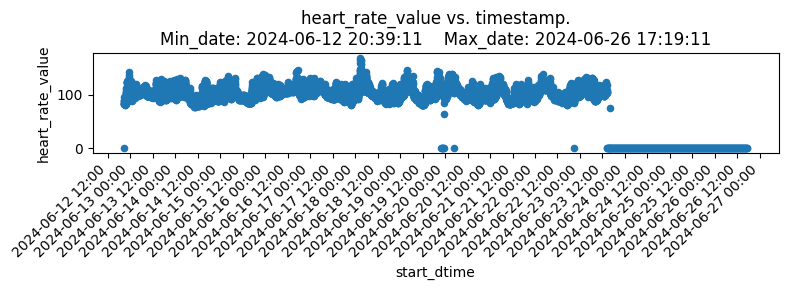

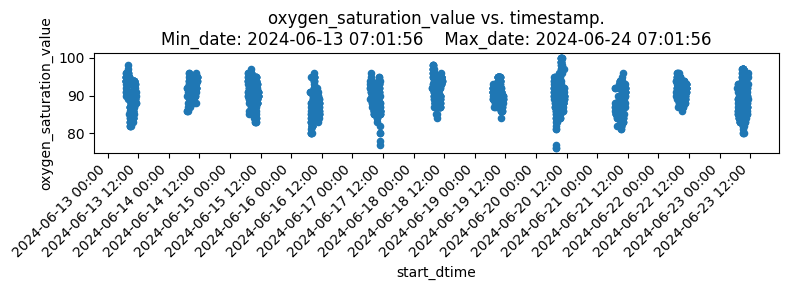

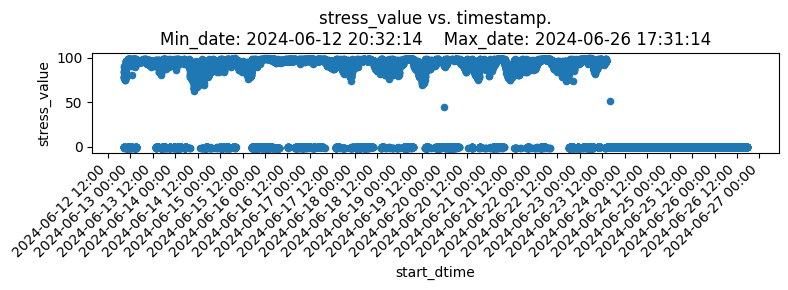

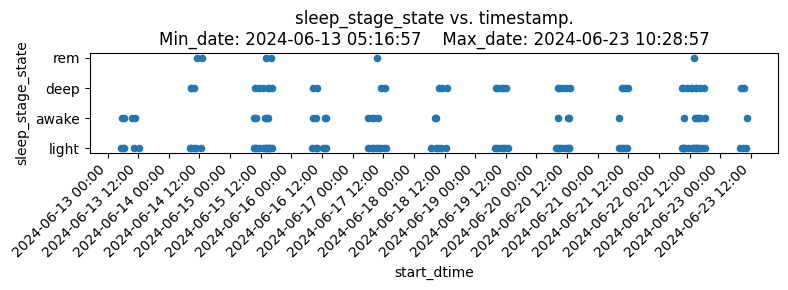

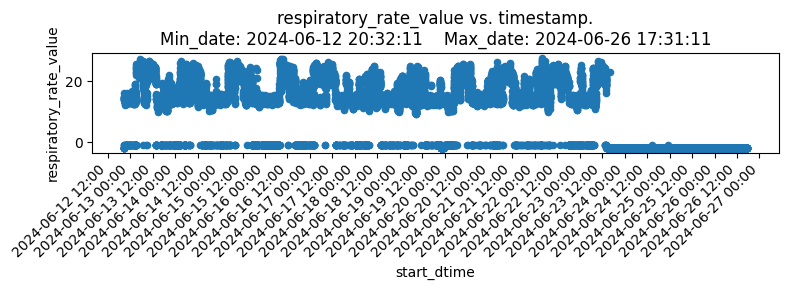

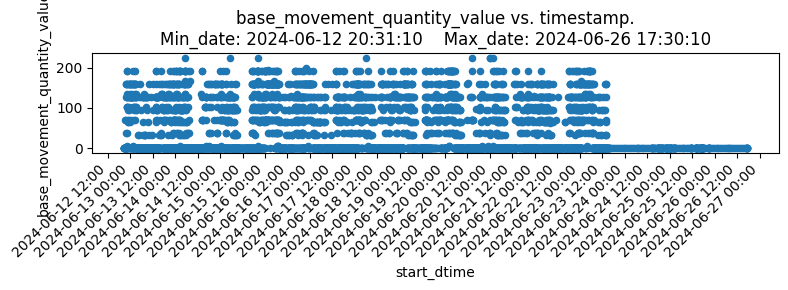

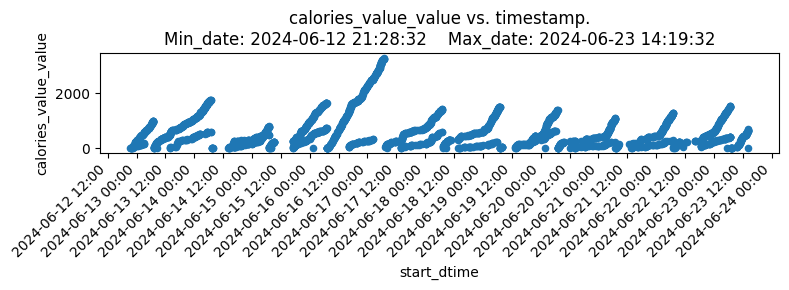

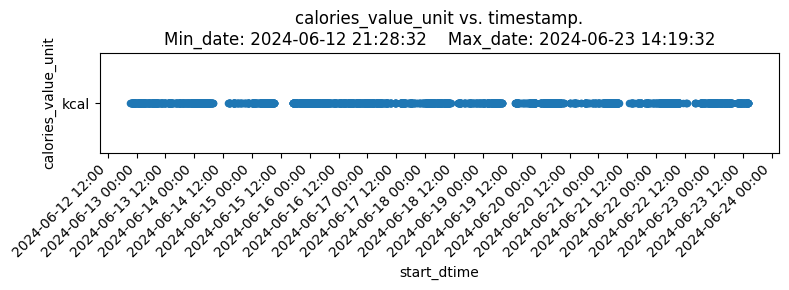

In [261]:
for k,v in full_file_dict.items():
    if (v == 'no_file'):
        print(f'  No file associated with {k}')
    else:
        h, b = open_mhealth_json(v, verbose=verbose)
        # print(f'  header has keys {h.keys()}')  # not used here, but can be explored
        if (verbose):
            print(f'  body has {len(b)} elements')
        if (len(b) > 0):
    
            df = create_dataframe_from_body(b, verbose=verbose)
            
            value_fields = [x for x in df.columns if '_value' in x or '_state' in x]
            if (verbose):
                print(f'  plottable value fields: {len(value_fields)} {value_fields}')
                
            for value_col in value_fields:
                min_dtime, max_dtime, fig = plot_activity(df, value_col, pid=pid, title=None)
                print(f'   data earliest timestamp: {min_dtime}    data latest timestamp: {max_dtime}')
        else:
            print(f'  No observation data so no plot for {v}') 
    print('\n','-'*40,'\n')

## Get the filepaths of the samples in common age and BMI range

In [262]:
def get_participant_data(csv_filepath, dfm):
  # Load the filtered data from CSV
  participant_data = pd.read_csv(csv_filepath)
  
  # Merge with dfm on 'participant_id'
  participant_data_merged = dfm.merge(participant_data, on='participant_id', how='inner')
  
  # Find unique participant IDs in each dataset
  dfm_ids = set(dfm['participant_id'])
  filtered_ids = set(participant_data_merged['participant_id'])
  merged_ids = set(participant_data_merged['participant_id'])
  
  # Find missing IDs
  missing_in_dfm = filtered_ids - merged_ids  # IDs in CSV but not in dfm
  missing_in_filtered = dfm_ids - merged_ids  # IDs in dfm but not in CSV
  
  # Display missing IDs
  print("IDs present in CSV but missing in dfm:", missing_in_dfm)
  print("IDs present in dfm but missing in CSV:", missing_in_filtered)
  
  # Select relevant columns
  key_columns = ['participant_id', 'physical_activity_filepath', 'average_daily_activity', 
                  'study_group', 'age', 'BMI', 'start_time', 'end_time', 'study_group_pre']
  participant_data_merged = participant_data_merged[key_columns]
  
  return participant_data_merged



### Function for getting running sessions, return all timeframe where running is more than 30 mins (allow 10 mins break)

In [263]:
def find_qualified_running_sessions(input_df, activities, min_duration, output_csv_path, min_steps_per_min=100, verbose=False):
    qualified_participants = []
    time_range_records = []
    activities = [a.lower() for a in activities]

    for idx, row in input_df.iterrows():
        activity_filepath = pilot_data_root + row['physical_activity_filepath']
        
        h, b = open_mhealth_json(activity_filepath, verbose=False)
        if len(b) == 0:
            continue
        
        df = create_dataframe_from_body(b, verbose=verbose)
        if 'activity_name' not in df.columns or 'start_time' not in df.columns or 'end_time' not in df.columns:
            continue

        df['start_time'] = pd.to_datetime(df['start_time'])
        df['end_time'] = pd.to_datetime(df['end_time'])
        df['start_dtime'] = pd.to_datetime(df['start_dtime'])
        df['activity_name'] = df['activity_name'].str.lower()
        df['steps'] = pd.to_numeric(df['base_movement_quantity_value'], errors='coerce')

        # Filter for target activities
        filtered_df = df[df['activity_name'].isin(activities)].copy()
        if filtered_df.empty:
            continue

        # Filter out entries with unrealistic duration (>3 hours = 180 minutes)
        filtered_df['entry_duration'] = (filtered_df['end_time'] - filtered_df['start_time']).dt.total_seconds() / 60
        filtered_df = filtered_df[filtered_df['entry_duration'] <= 180]
        if filtered_df.empty:
            continue

        filtered_df = filtered_df.sort_values(by='start_dtime')
        filtered_df['time_diff'] = filtered_df['start_time'].diff().dt.total_seconds().fillna(0)
        filtered_df['group'] = (filtered_df['time_diff'] > 900).cumsum()

        grouped_sessions = (
            filtered_df.groupby('group')
            .agg(
                start_time=('start_time', 'min'), 
                end_time=('end_time', 'max'),
                total_steps=('steps', 'sum'),
                duration_for_steps=('entry_duration', 'sum'))
        )

        grouped_sessions['duration'] = (grouped_sessions['end_time'] - grouped_sessions['start_time']).dt.total_seconds() / 60
        grouped_sessions['avg_steps_per_min'] = grouped_sessions['total_steps'] / grouped_sessions['duration_for_steps']
        valid_sessions = grouped_sessions[(grouped_sessions['duration'] >= min_duration) & (grouped_sessions['avg_steps_per_min'] >= min_steps_per_min)]

        if not valid_sessions.empty:
            participant_id = row['participant_id']
            qualified_participants.append(participant_id)

            for session in valid_sessions.itertuples():
                time_range_records.append({
                    "participant_id": participant_id,
                    "actual_start_time": session.start_time,
                    "actual_end_time": session.end_time,
                    "duration_minutes": session.duration,
                    "total_steps": session.total_steps,
                    "avg_steps_per_min": session.avg_steps_per_min,
                })

    output_df = pd.DataFrame(time_range_records)

    for col in ['actual_start_time', 'actual_end_time']:
        output_df[col] = output_df[col].dt.tz_localize(None)

    output_df = output_df.merge(
        input_df[['participant_id', 'study_group', 'study_group_pre']],
        on='participant_id',
        how='inner'
    )
    output_df.to_csv(output_csv_path, index=False)
    print(f'Saved qualified running sessions to {output_csv_path}')


In [264]:
# import pandas as pd

# def find_qualified_running_sessions(input_df, activities, min_duration, output_csv_path, step_threshold=1, verbose=False):
#     qualified_participants = []
#     time_range_records = []
#     activities = [a.lower() for a in activities]

#     for idx, row in input_df.iterrows():
#         activity_filepath = pilot_data_root + row['physical_activity_filepath']

#         h, b = open_mhealth_json(activity_filepath, verbose=False)
#         if len(b) == 0:
#             continue

#         df = create_dataframe_from_body(b, verbose=verbose)
#         expected_cols = ['activity_name', 'base_movement_quantity_value', 'start_time', 'end_time', 'start_dtime']
#         if not all(col in df.columns for col in expected_cols):
#             if verbose:
#                 print(f"Skipping {row['participant_id']} due to missing columns")
#             continue

#         # Process columns to correct data types
#         df['activity_name'] = df['activity_name'].str.lower()
#         df['start_time'] = pd.to_datetime(df['start_time'])
#         df['end_time'] = pd.to_datetime(df['end_time'])
#         df['start_dtime'] = pd.to_datetime(df['start_dtime'])
#         df['steps'] = pd.to_numeric(df['base_movement_quantity_value'], errors='coerce')

#         # Filter for relevant activities and compute the steps
#         filtered_df = df[df['activity_name'].isin(activities)].copy()
#         if filtered_df.empty:
#             continue

#         # Remove long sessions > 180 minutes
#         filtered_df['entry_duration'] = (filtered_df['end_time'] - filtered_df['start_time']).dt.total_seconds() / 60
#         filtered_df = filtered_df[filtered_df['entry_duration'] <= 180]
#         if filtered_df.empty:
#             continue

#         filtered_df = filtered_df.sort_values(by='start_dtime')
#         filtered_df['time_diff'] = filtered_df['start_time'].diff().dt.total_seconds().fillna(0)
#         filtered_df['group'] = (filtered_df['time_diff'] > 600).cumsum()

#         # Group by the 10-minute gap to maintain full time range
#         grouped = filtered_df.groupby('group').agg(
#             start_time=('start_time', 'min'),
#             end_time=('end_time', 'max'),
#             total_steps=('steps', 'sum'),
#             duration=('entry_duration', 'sum')
#         )

#         grouped = grouped[grouped['duration'] > 0]  # Avoid divide-by-zero
#         grouped['avg_steps_per_min'] = grouped['total_steps'] / grouped['duration']

#         # Find valid sessions based on minimum duration and step threshold
#         valid_sessions = grouped[
#             (grouped['duration'] >= min_duration) &
#             (grouped['avg_steps_per_min'] >= step_threshold)
#         ]

#         if not valid_sessions.empty:
#             participant_id = row['participant_id']
#             qualified_participants.append(participant_id)

#             for session in valid_sessions.itertuples():
#                 # For the time range, use the full 10-minute gap including other activities
#                 time_range_records.append({
#                     "participant_id": participant_id,
#                     "actual_start_time": session.start_time,
#                     "actual_end_time": session.end_time,
#                     "duration_minutes": session.duration,
#                     "total_steps": session.total_steps,
#                     "avg_steps_per_min": session.avg_steps_per_min,
#                     "start_dtime_range": session.start_time - pd.Timedelta(minutes=10),
#                     "end_dtime_range": session.end_time + pd.Timedelta(minutes=10)
#                 })

#     # Save the results to a DataFrame
#     output_df = pd.DataFrame(time_range_records)

#     # Remove timezone information if present
#     for col in ['actual_start_time', 'actual_end_time', 'start_dtime_range', 'end_dtime_range']:
#         output_df[col] = output_df[col].dt.tz_localize(None)

#     # Merge additional participant info from input_df
#     output_df = output_df.merge(
#         input_df[['participant_id', 'study_group', 'study_group_pre']],
#         on='participant_id',
#         how='inner'
#     )

#     # Save to CSV
#     output_df.to_csv(output_csv_path, index=False)
#     print(f'Saved qualified running sessions to {output_csv_path}')


In [265]:
filtered_participants_df = get_participant_data('filtered_data.csv', dfm)
find_qualified_running_sessions(filtered_participants_df, ['running'], 30, 'qualified_running_sessions.csv', 0)

participants_df_all = get_participant_data('participant_data_all.csv', dfm)
find_qualified_running_sessions(participants_df_all, ['running', 'generic'], 30, 'qualified_running_sessions_all.csv', 50)

IDs present in CSV but missing in dfm: set()
IDs present in dfm but missing in CSV: {7327, 4100, 4101, 7328, 4103, 4104, 4105, 4106, 4107, 4108, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4121, 4123, 4125, 7332, 4127, 4128, 7333, 4130, 4131, 4132, 4133, 4134, 4136, 7334, 4138, 4139, 4140, 4141, 4142, 4143, 4145, 4146, 4147, 4148, 4149, 4150, 4151, 7337, 4153, 4154, 4155, 4156, 4158, 4159, 4160, 4162, 4163, 4164, 4165, 4167, 4168, 4169, 4170, 4171, 4172, 7341, 4175, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4188, 4189, 4190, 4191, 4192, 4193, 7345, 7346, 4196, 7347, 4200, 4201, 4202, 4203, 7348, 4205, 4206, 4208, 7168, 4210, 4211, 4212, 7350, 4215, 4216, 7351, 4219, 4220, 4221, 4222, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232, 7169, 4234, 4235, 4236, 4237, 7354, 4239, 4240, 4241, 7355, 7356, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257, 7358, 7359, 4261, 4263, 4264, 4265, 4266, 4267, 4269, 4270, 427

C:\Users\Hieu\AppData\Local\Temp\ipykernel_20928\824336435.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time'] = pd.to_datetime(df['end_time'])
C:\Users\Hieu\AppData\Local\Temp\ipykernel_20928\824336435.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_time'] = pd.to_datetime(df['start_time'])
C:\Users\Hieu\AppData\Local\Temp\ipykernel_20928\824336435.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time'] = pd.to_datetime(df['end_time'])


Saved qualified running sessions to qualified_running_sessions_all.csv


## Function to get the most active day of each participant

In [266]:
# Function to get the most active day from the activity data
def get_most_active_day(df):
    # Create a dictionary to store total activity per day
    daily_activity = {}
    
    # Iterate over the rows of the DataFrame
    for idx, row in df.iterrows():
        # Access the datetime and activity value
        timestamp = row['start_dtime']  # Assuming 'start_dtime' is a datetime object
        activity_level = row['base_movement_quantity_value']  # Activity value
        
        # Extract the date from the datetime
        date = timestamp.date()  # Convert datetime to date
        
        # Sum the activity for the day
        if date not in daily_activity:
            daily_activity[date] = 0
        daily_activity[date] += activity_level
    
    # Find the day with the maximum activity
    most_active_day = max(daily_activity, key=daily_activity.get)
    most_activity_level = daily_activity[most_active_day]
    return most_active_day, most_activity_level

for idx, row in filtered_participants_df.iterrows():
    activity_filepath = pilot_data_root + row['physical_activity_filepath']
    
    h, b = open_mhealth_json(activity_filepath, verbose=False)
    
    if len(b) == 0:
        continue  # Skip if no data
    
    df = create_dataframe_from_body(b, verbose=False)
    
    # Get the most active day for this participant
    most_active_day, most_activity_level = get_most_active_day(df)
    
    # Add the most active day to the dataframe (you can modify the original df or create a new column)
    filtered_participants_df.at[idx, 'most_active_day'] = most_active_day
    filtered_participants_df.at[idx, 'most_activity_level'] = most_activity_level



In [267]:
# Display the updated DataFrame
print(filtered_participants_df.shape)

# Find the participant_id with the highest most_activity_level
max_activity_id = filtered_participants_df.loc[filtered_participants_df['most_activity_level'].idxmax(), 'participant_id']
print(f'The participant_id with the highest most_activity_level is: {max_activity_id}, with the level: {filtered_participants_df["most_activity_level"].max()}')



(83, 11)
The participant_id with the highest most_activity_level is: 7143, with the level: 41933.0


# A few final notes

Note that the watch keeps recording after the participant takes it off, and some variables save the data: heart rate, stress, respiratory, and movement

Other values stop being saved, so they could be used to help locate only the data of interest: oxygen_saturation, sleep (shown above), kcalorie

In [268]:
print('Done')

Done
